# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
import time
import scipy.stats as st
from scipy.stats import linregress
import sklearn.datasets as dta
import json
import random
import datetime
from api_keys import g_key

from api_keys import weather_api_key

from citipy import citipy
gmaps.configure(api_key=g_key)
import csv
output_data_file = "cities.csv"

## Generate Cities List

In [55]:
latitude_range=(-90,90)
longitude_range=(-180,180) 
lat_longs = []
cities = []
equator_lats = []
equator_longs = []

lats = np.random.uniform(latitude_range[0], latitude_range[1],size=1700)
longs = np.random.uniform(longitude_range[0], longitude_range[1],size=1700)
lat_longs = zip(lats, longs)
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in cities:
        cities.append(city)
        equator_lats.append(lat_long[0])
        equator_longs.append(lat_long[1])
        cities_eq = len(cities)
print(f"The total number of cities at varying distance from equator are : {cities_eq}")

The total number of cities at varying distance from equator are : 680


In [56]:
city_list = pd.DataFrame({"City":cities, "Latitude":equator_lats, "Longitude":equator_longs})

city_list.head()

,City,Latitude,Longitude
0,saint george,32.714003,-55.162756
1,ponta delgada,30.419174,-26.530201
2,port augusta,-32.523024,137.524042
3,cape town,-59.549624,-10.414126
4,mogadishu,0.663237,47.908689


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
# Lists for results
lats = []
longs = []
Cities = []
temp = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []
record_count = len(city_list)

print("Beginning Data Retrieval")
print("-"*50)

for i, row in city_list.iterrows():
    try:
        response = requests.get(query_url + city).json()
        lats.append(response["coord"]["lat"])
        longs.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        Cities.append(city)
        
        
        print("Processing record {} of Set {} | {}".format(i+1,sets, row["City"]))
    except:
        city_list["City"][i] = "Failed!!!"
        print("City {} not found. Skipping...".format(row["City"]))
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()
        pass
        print("Data retrieval is complete.")
        
city_list.head()      


Beginning Data Retrieval
--------------------------------------------------
Processing record 1 of Set 0 | saint george
Processing record 2 of Set 0 | ponta delgada
Processing record 3 of Set 0 | port augusta
Processing record 4 of Set 0 | cape town
Processing record 5 of Set 0 | mogadishu
Processing record 6 of Set 0 | barra patuca
Processing record 7 of Set 0 | college
Processing record 8 of Set 0 | algiers
Processing record 9 of Set 0 | hobart
Processing record 10 of Set 0 | bayan
Processing record 11 of Set 0 | ushuaia
Processing record 12 of Set 0 | bredasdorp
Processing record 13 of Set 0 | bangui
Processing record 14 of Set 0 | vaini
Processing record 15 of Set 0 | siocon
Processing record 16 of Set 0 | bambous virieux
Processing record 17 of Set 0 | avarua
Processing record 18 of Set 0 | new norfolk
Processing record 19 of Set 0 | fortuna
Processing record 20 of Set 0 | georgetown
Processing record 21 of Set 0 | taihe
Processing record 22 of Set 0 | atuona
Processing record 23 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
#Creates table/DataFrame from the "city_data" dictionary
city_data = {"City": [],
              "Lat": [],
              "Lng": [],
              "Max Temp": [],
              "Humidity": [],
              "Cloudiness": [],
              "Wind Speed": [],
              "Country": [],
              "Date": []}
city_data_df = pd.DataFrame(city_data)
city_data_df = pd.read_csv(output_data_file , delimiter=',', encoding='cp437',index_col=0)
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...
543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05


In [4]:
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...
543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05


In [5]:
city_data_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,49.405109,1.558379e+09,67.671533,19.665146,20.675529,64.970785,8.672682
std,36.914201,7.820486e+01,23.697626,33.623560,90.307948,18.704318,5.865974
min,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,13.750000,1.558379e+09,52.000000,-6.267500,-61.015000,53.970000,4.680000
50%,46.500000,1.558379e+09,71.000000,21.390000,21.240000,64.990000,7.010000
75%,81.000000,1.558379e+09,86.000000,47.887500,102.937500,80.600000,11.410000
max,100.000000,1.558379e+09,290.000000,78.220000,179.320000,104.100000,46.080000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
clean_city_data= city_data_df[city_data_df['Humidity']<101]
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...
543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05


In [7]:
count_city = city_data_df["Humidity"].value_counts()
count_city

93     28
74     19
88     19
72     15
76     15
       ..
5       1
11      1
290     1
17      1
12      1
Name: Humidity, Length: 89, dtype: int64

In [8]:
badHumiditydF = city_data_df[(city_data_df['Humidity'] > 100)]
badHumiditydF

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
129,paita,0,PE,1558378778,290,-5.09,-81.11,62.6,17.22


In [9]:
#  Get the indices of cities that have humidity over 100%.
badHumiditydF.index

Int64Index([129], dtype='int64', name='City_ID')

In [52]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data
clean_city_data=city_data_df.drop(city_data_df.index[129], inplace=False)
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...
543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05


In [10]:
city_data_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...
543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

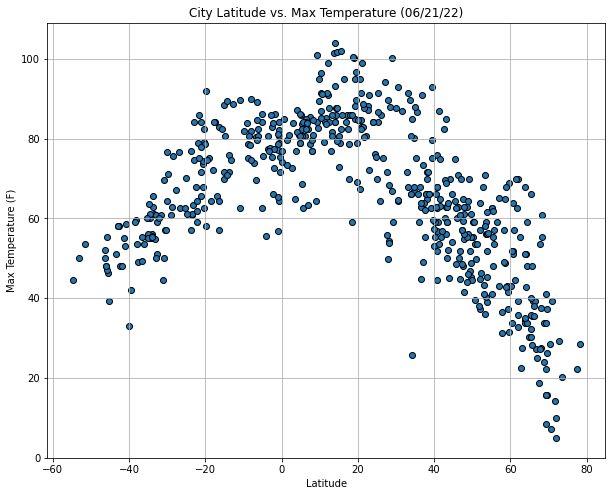

In [48]:
# Establishes size for the next visualization/graph
plt.figure(figsize=(10,8))

# Establishes type, data, and configuration for visualization/graph
plt.scatter(lat, max_temp, linewidths=1,edgecolor="black", marker="o")

# Creates labels and grid for graph
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig(f'Northern Hemisphere Latitude vs Temp1(%s).png')
plt.grid(True)

# Exports graph as a png image file (steps are repeated for the rest of the script...)

## Latitude vs. Humidity Plot

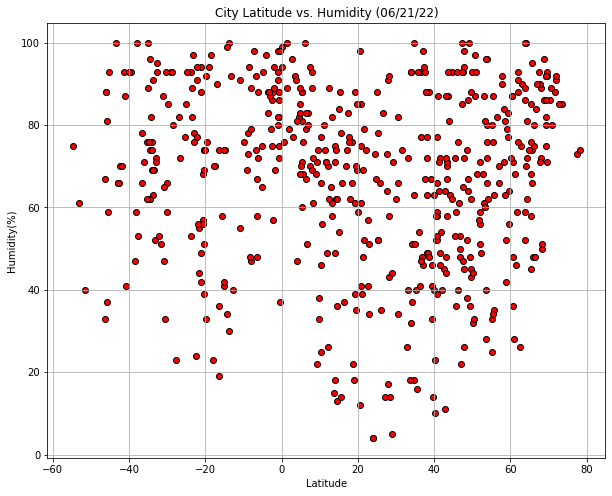

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o",edgecolor="black", linewidths=1, color = 'r')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.savefig(f'Latitude vs. Cloudiness Plot.png')
plt.grid(True)

In [ ]:
#Latitude vs. Cloudiness Plot

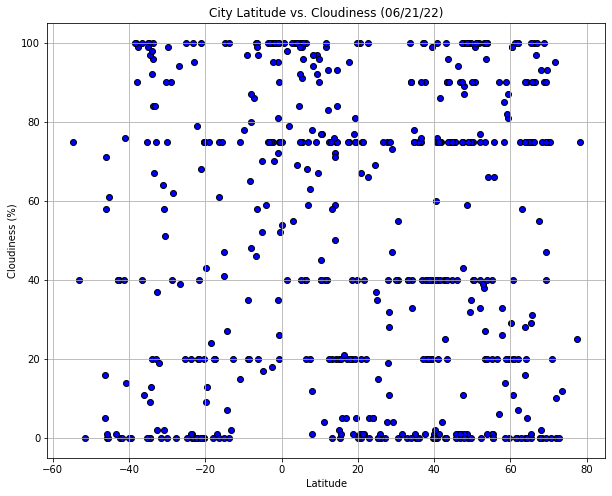

In [49]:
plt.figure(figsize=(10,8))

plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"],edgecolor="black", linewidths=1, marker="o",color="blue")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'Latitude vs. Cloudiness Plot.png')
plt.grid(True)

## Latitude vs. Wind Speed Plot

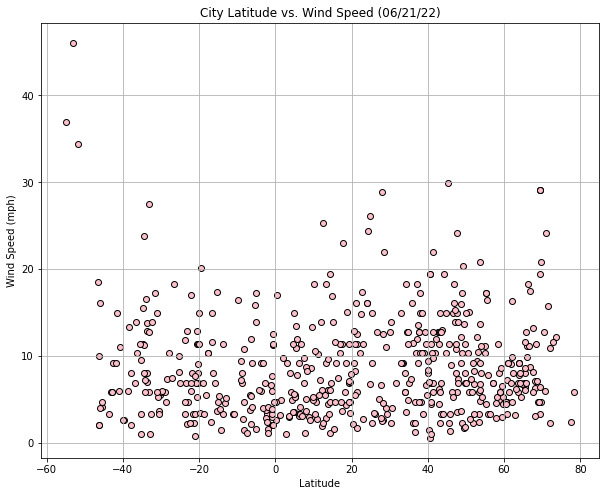

In [50]:
plt.figure(figsize=(10,8))

plt.scatter(lat, wind_speed, edgecolor="black",linewidths=1, marker="o",color='pink')

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig(f'Latitude vs. Cloudiness Plot.png')
plt.grid(True)

## Linear Regression

In [22]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

Northern_DF = clean_city_data.loc[clean_city_data["Lat"] > 0]
Southern_DF = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.8151657406810822
y = -0.82x + 95.11


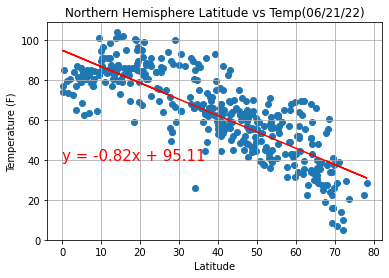

In [32]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp(%s)' % time.strftime("%x"))
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'Northern Hemisphere Latitude vs Temp(%s).png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7668153152076321
y = 0.69x + 83.07


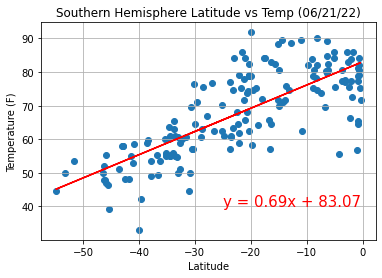

In [34]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Max Temp"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp (%s)' % time.strftime("%x"))
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.10358336015746498
y = 0.11x + 60.85


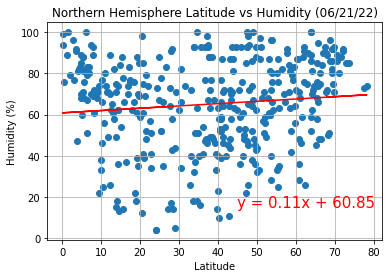

In [35]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity (%s)' % time.strftime("%x"))
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Northern Hemisphere Latitude vs Humidity .png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.1139892818606221
y = 0.16x + 75.63


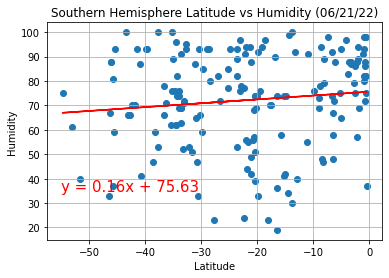

In [38]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity"
plt.title(f'Southern Hemisphere Latitude vs Humidity (%s)' % time.strftime("%x"))
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.08733547918934018
y = -0.15x + 55.94


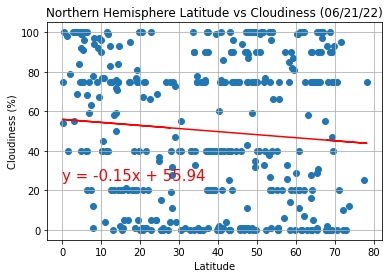

In [47]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness (%s)' % time.strftime("%x"))
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.23009846166335704
y = 0.61x + 61.97


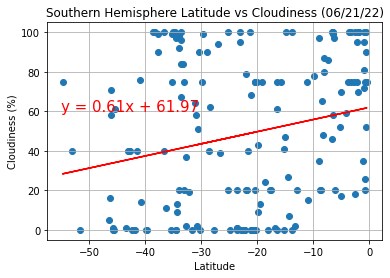

In [46]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness (%s)' % time.strftime("%x"))
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.10713827743884795
y = 0.03x + 7.79


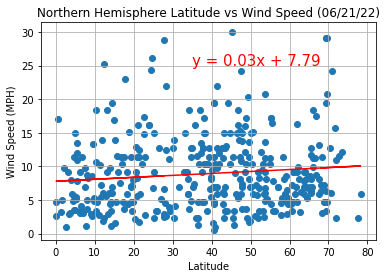

In [45]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Wind Speed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed (%s)' % time.strftime("%x"))
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.33605638539234134
y = -0.15x + 4.71


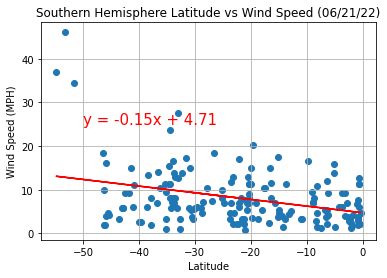

In [44]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Wind Speed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed (%s)' % time.strftime("%x"))
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Wind Speed.png')
plt.show()